In [127]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [128]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [129]:
from datetime import datetime, timedelta
d = datetime.today() - timedelta(days=1)
fecha_actual = d.strftime('%m-%d-%Y')
print(fecha_actual)
fecha_actual2 = d.strftime('%Y-%m-%d')
print(fecha_actual2)

09-15-2020
2020-09-15


In [130]:
latest_data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/" + fecha_actual + ".csv")
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'+ fecha_actual + ".csv")

In [131]:
latest_data

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-09-16 04:22:53,33.939110,67.709953,38815,1426,32098,5291.0,Afghanistan,99.708847,3.673837
1,NaN,NaN,NaN,Albania,2020-09-16 04:22:53,41.153300,20.168300,11672,340,6668,4664.0,Albania,405.587602,2.912954
2,NaN,NaN,NaN,Algeria,2020-09-16 04:22:53,28.033900,1.659600,48734,1632,34385,12717.0,Algeria,111.135327,3.348791
3,NaN,NaN,NaN,Andorra,2020-09-16 04:22:53,42.506300,1.521800,1438,53,945,440.0,Andorra,1861.127289,3.685675
4,NaN,NaN,NaN,Angola,2020-09-16 04:22:53,-11.202700,17.873900,3569,139,1332,2098.0,Angola,10.859158,3.894648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,NaN,NaN,NaN,West Bank and Gaza,2020-09-16 04:22:53,31.952200,35.233200,32250,229,21804,10217.0,West Bank and Gaza,632.177419,0.710078
3950,NaN,NaN,NaN,Western Sahara,2020-09-16 04:22:53,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3951,NaN,NaN,NaN,Yemen,2020-09-16 04:22:53,15.552727,48.516388,2016,583,1219,214.0,Yemen,6.759211,28.918651
3952,NaN,NaN,NaN,Zambia,2020-09-16 04:22:53,-13.133897,27.849332,13819,324,12590,905.0,Zambia,75.168805,2.344598


In [132]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [133]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20
0,0,0,0,0,0,0,0,0,0,0,...,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815
1,0,0,0,0,0,0,0,0,0,0,...,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672
2,0,0,0,0,0,0,0,0,0,0,...,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734
3,0,0,0,0,0,0,0,0,0,0,...,1215,1261,1261,1301,1301,1344,1344,1344,1438,1438
4,0,0,0,0,0,0,0,0,0,0,...,2965,2981,3033,3092,3217,3279,3335,3388,3439,3569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,26127,26779,27363,27919,28664,29256,29906,30574,31362,32250
262,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,0,0,0,0,0,0,0,0,0,0,...,1987,1989,1994,1999,2003,2007,2009,2011,2013,2016
264,0,0,0,0,0,0,0,0,0,0,...,12776,12836,12952,13112,13214,13323,13466,13539,13720,13819


In [134]:
deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20
0,0,0,0,0,0,0,0,0,0,0,...,1412,1415,1418,1420,1420,1420,1420,1420,1425,1426
1,0,0,0,0,0,0,0,0,0,0,...,316,319,321,322,324,327,330,334,338,340
2,0,0,0,0,0,0,0,0,0,0,...,1556,1562,1571,1581,1591,1599,1605,1612,1620,1632
3,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,0,0,0,0,0,0,0,0,0,0,...,117,120,124,126,130,131,132,134,136,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,181,184,190,192,198,204,210,221,226,229
262,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
263,0,0,0,0,0,0,0,0,0,0,...,572,573,576,576,580,582,582,583,583,583
264,0,0,0,0,0,0,0,0,0,0,...,295,295,297,300,300,306,312,312,320,324


In [135]:
recoveries

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20
0,0,0,0,0,0,0,0,0,0,0,...,30537,30557,30715,31048,31129,31154,31234,31638,32073,32098
1,0,0,0,0,0,0,0,0,0,0,...,6106,6186,6239,6284,6346,6443,6494,6569,6615,6668
2,0,0,0,0,0,0,0,0,0,0,...,32745,32985,33183,33379,33562,33723,33875,34037,34204,34385
3,0,0,0,0,0,0,0,0,0,0,...,928,934,934,938,938,943,943,943,945,945
4,0,0,0,0,0,0,0,0,0,0,...,1198,1215,1215,1245,1277,1288,1289,1301,1324,1332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0,0,0,0,0,0,0,0,0,0,...,16843,17270,17779,18466,18821,19788,19979,20082,21406,21804
249,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
250,0,0,0,0,0,0,0,0,0,0,...,1200,1201,1203,1209,1211,1211,1211,1212,1215,1219
251,0,0,0,0,0,0,0,0,0,0,...,11674,11748,11787,11839,11899,11899,12007,12260,12380,12590


In [136]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

window = 7

world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)

world_daily_recovery = daily_increase(total_recovered)
world_recovery_avg = moving_average(total_recovered, window)
world_daily_recovery_avg = moving_average(world_daily_recovery, window)

world_active_avg = moving_average(total_active, window)
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
days_in_future = 50
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-50]


In [137]:
import datetime
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [138]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.05, shuffle=False) 

MAE: 2066077.4186081756
MSE: 4360943216049.0312


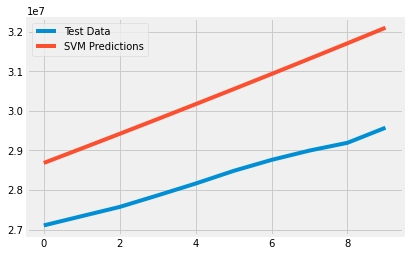

In [139]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [140]:
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 706546.3804854989
MSE: 599379840961.3198


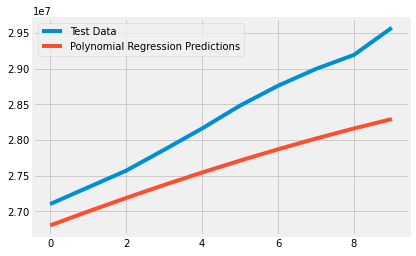

In [141]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [142]:
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)
bayesian_search.best_params_
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    1.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.7s finished


MAE: 782367.5028294675
MSE: 639494360213.8223


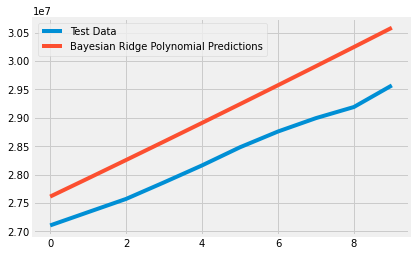

In [143]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

TypeError: only size-1 arrays can be converted to Python scalars

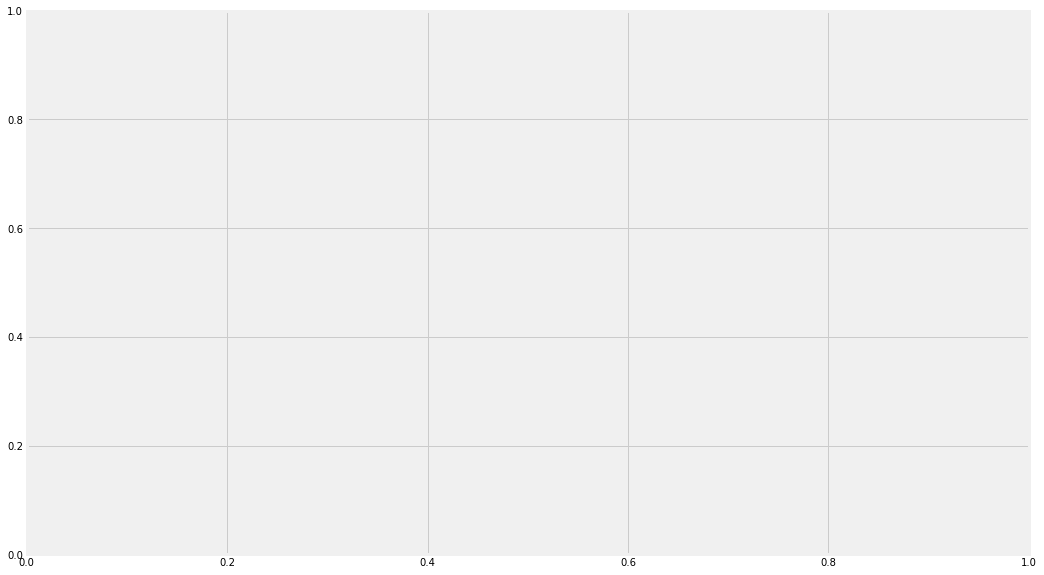

In [144]:
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_death)
plt.plot(adjusted_dates, world_daily_death_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Deaths'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_recovery)
plt.plot(adjusted_dates, world_daily_recovery_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Recoveries'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [145]:
def country_plot(x, y1, y2, y3, y4, country):
    # window is set as 14 in in the beginning of the notebook 
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
    recovery_increase_avg = moving_average(y4, window)
    
    plt.figure(figsize=(16, 10))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y4)
    plt.plot(x, recovery_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Recoveries'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
      
# helper function for getting country's cases, deaths, and recoveries        
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
    country_recoveries = []  
    
    for i in dates:
        country_cases.append(confirmed_df[confirmed_df['Country/Region']==country_name][i].sum())
        country_deaths.append(deaths_df[deaths_df['Country/Region']==country_name][i].sum())
        country_recoveries.append(recoveries_df[recoveries_df['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths, country_recoveries)
    
    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    country_recoveries = country_info[2]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
    country_daily_recovery = daily_increase(country_recoveries)
    
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_daily_recovery, country_name)
    

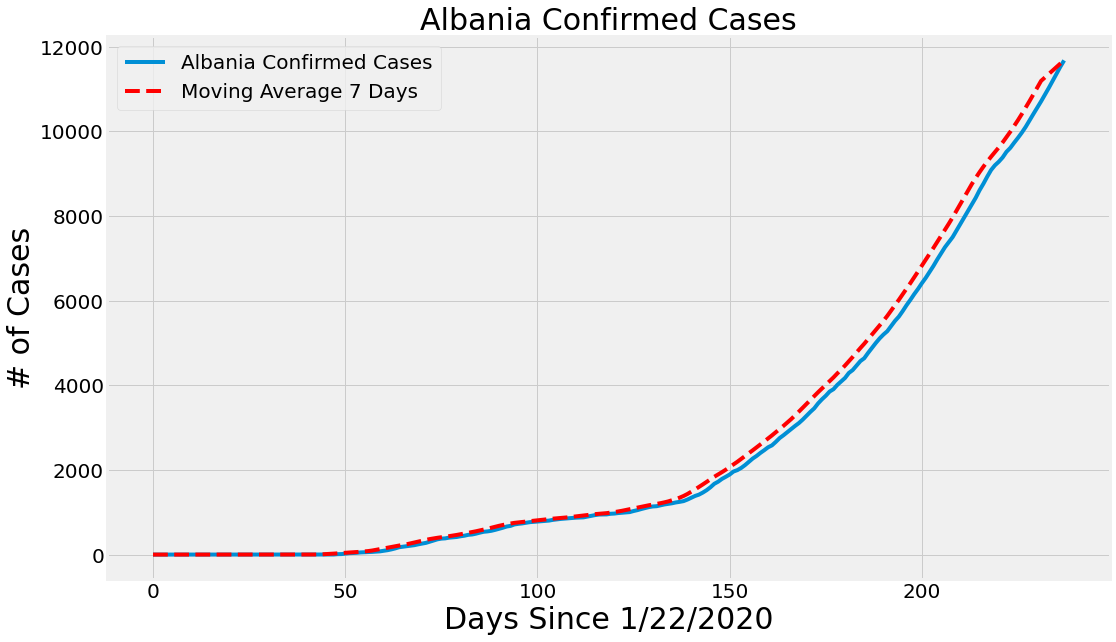

TypeError: only size-1 arrays can be converted to Python scalars

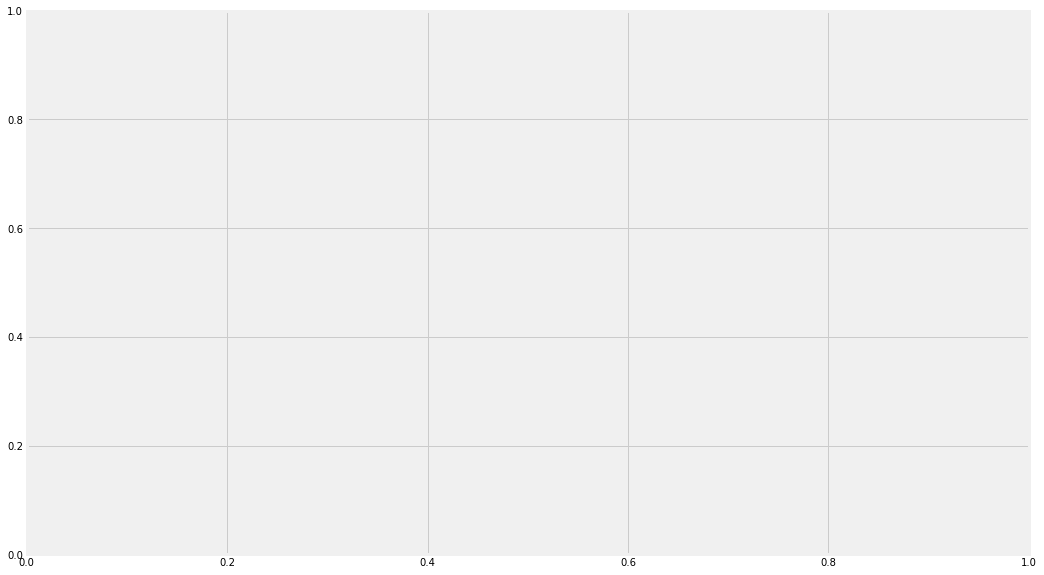

In [146]:
countries = ['Albania',
'Algeria',
'Andorra',
'Angola',
'Antigua and Barbuda',
'Argentina',
'Armenia',
'Australia',
'Austria',
'Azerbaijan',
'Bahamas',
'Bahrain',
'Bangladesh',
'Barbados',
'Belarus',
'Belgium',
'Belize',
'Benin',
'Bhutan',
'Bolivia',
'Bosnia and Herzegovina',
'Botswana',
'Brazil',
'Brunei',
'Bulgaria',
'Burkina Faso',
'Burma',
'Burundi',
'Cabo Verde',
'Cambodia',
'Cameroon',
'Canada',
'Central African Republic',
'Chad',
'Chile',
'Colombia',
'Comoros',
'Congo (Brazzaville)',
'Congo (Kinshasa)',
'Costa Rica',
'Croatia',
'Cuba',
'Cyprus',
'Czechia',
'Denmark',
'Diamond Princess',
'Djibouti',
'Dominica',
'Dominican Republic',
'Ecuador',
'Egypt',
'El Salvador',
'Equatorial Guinea',
'Eritrea',
'Estonia',
'Eswatini',
'Ethiopia',
'Fiji',
'Finland',
'France',
'Gabon',
'Gambia',
'Georgia',
'Germany',
'Ghana',
'Greece',
'Grenada',
'Guatemala',
'Guinea',
'Guinea-Bissau',
'Guyana',
'Haiti',
'Holy See',
'Honduras',
'Hungary',
'Iceland',
'India',
'Indonesia',
'Iran',
'Iraq',
'Ireland',
'Israel',
'Italy',
'Jamaica',
'Japan',
'Jordan',
'Kazakhstan',
'Kenya',
'Korea, South',
'Kosovo',
'Kuwait',
'Kyrgyzstan',
'Laos',
'Latvia',
'Lebanon',
'Lesotho',
'Liberia',
'Libya',
'Liechtenstein',
'Lithuania',
'Luxembourg',
'MS Zaandam',
'Madagascar',
'Malawi',
'Malaysia',
'Maldives',
'Mali',
'Malta',
'Mauritania',
'Mauritius',
'Mexico',
'Moldova',
'Monaco',
'Mongolia',
'Montenegro',
'Morocco',
'Mozambique',
'Namibia',
'Nepal',
'Netherlands',
'New Zealand',
'Nicaragua',
'Niger',
'Nigeria',
'North Macedonia',
'Norway',
'Oman',
'Pakistan',
'Panama',
'Papua New Guinea',
'Paraguay',
'Peru',
'Philippines',
'Poland',
'Portugal',
'Qatar',
'Romania',
'Russia',
'Rwanda',
'Saint Kitts and Nevis',
'Saint Lucia',
'Saint Vincent and the Grenadines',
'San Marino',
'Sao Tome and Principe',
'Saudi Arabia',
'Senegal',
'Serbia',
'Seychelles',
'Sierra Leone',
'Singapore',
'Slovakia',
'Slovenia',
'Somalia',
'South Africa',
'South Sudan',
'Spain',
'Sri Lanka',
'Sudan',
'Suriname',
'Sweden',
'Switzerland',
'Syria',
'Taiwan*',
'Tajikistan',
'Tanzania',
'Thailand',
'Timor-Leste',
'Togo',
'Trinidad and Tobago',
'Tunisia',
'Turkey',
'US',
'Uganda',
'Ukraine',
'United Arab Emirates',
'United Kingdom',
'Uruguay',
'Uzbekistan',
'Venezuela',
'Vietnam',
'West Bank and Gaza',
'Western Sahara',
'Yemen',
'Zambia',
'Zimbabwe',
] 

for country in countries:
    country_visualizations(country)

In [ ]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Worldwide Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

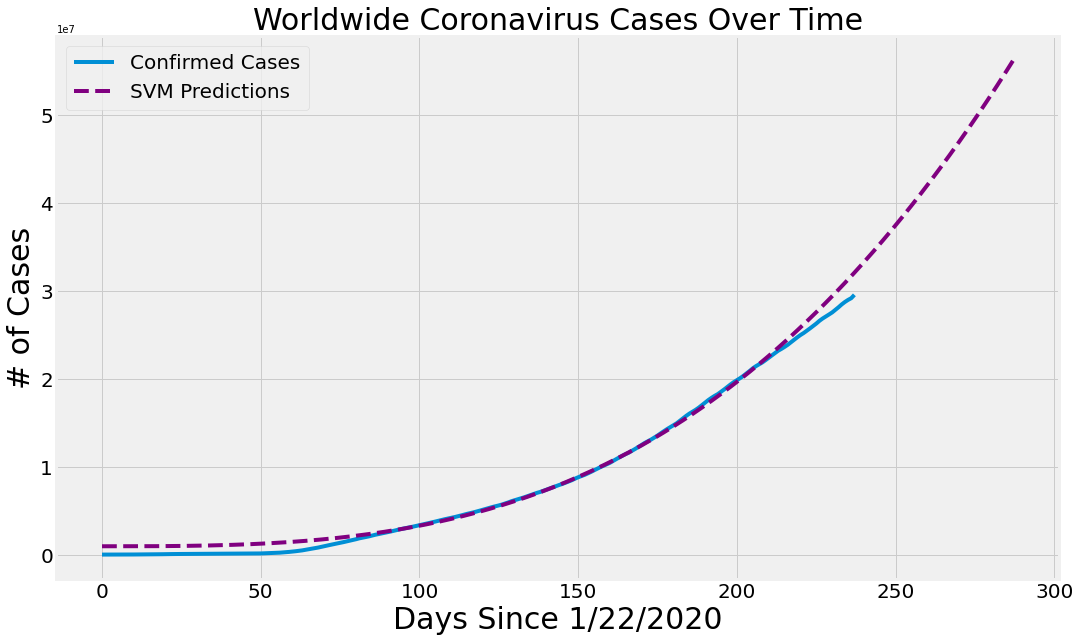

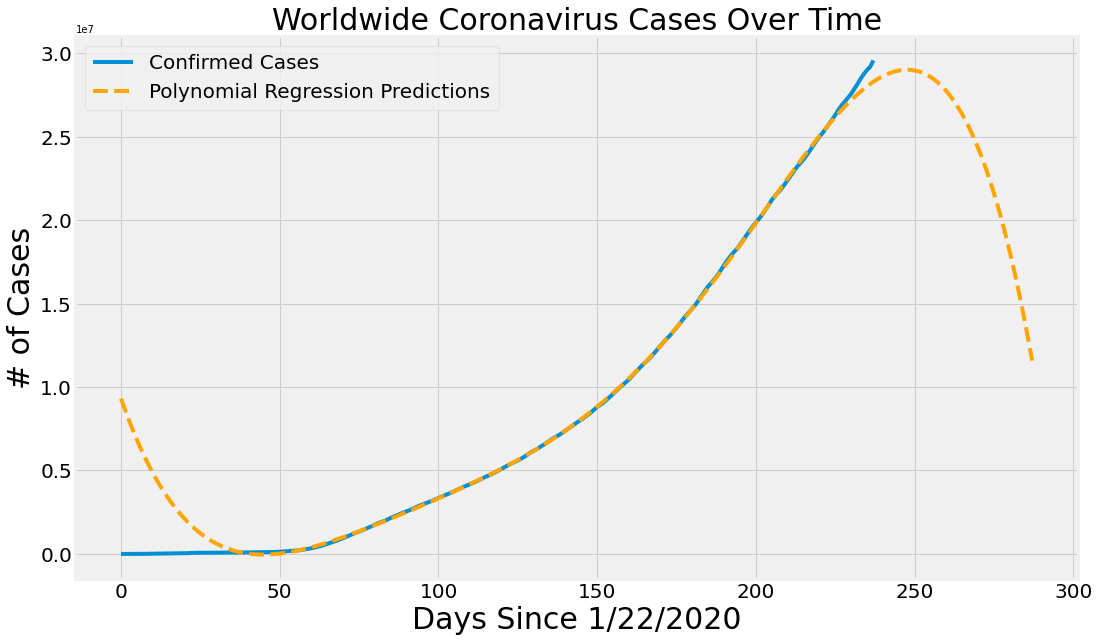

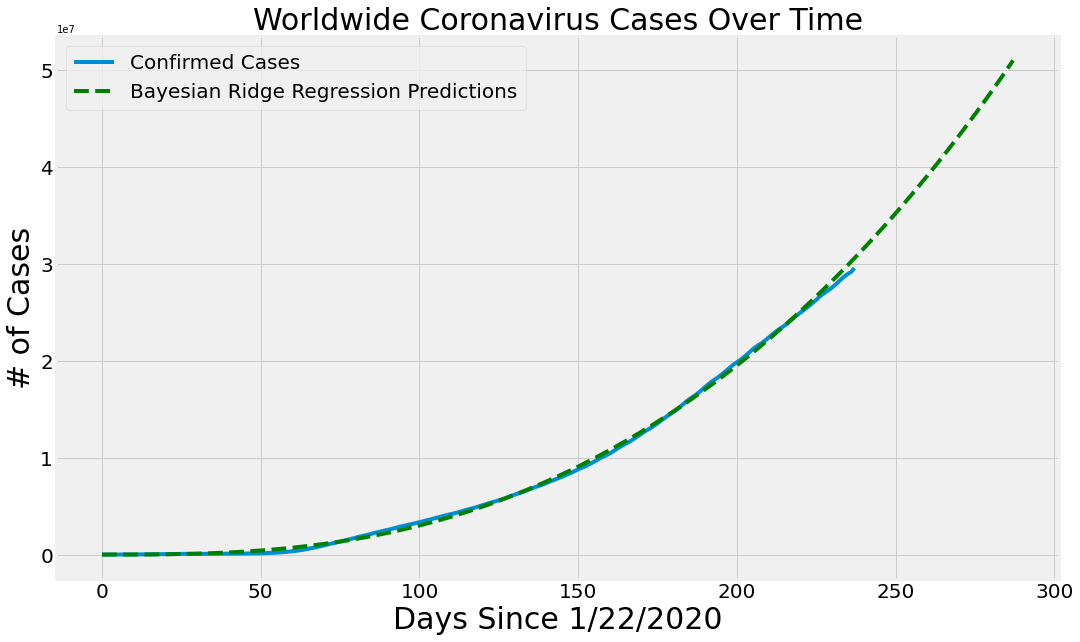

In [147]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple')
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green')

In [148]:
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(days_since_1_22[50:], total_deaths[50:], test_size=0.05, shuffle=False)

MAE: 132726.53414293582
MSE: 17870681239.023636


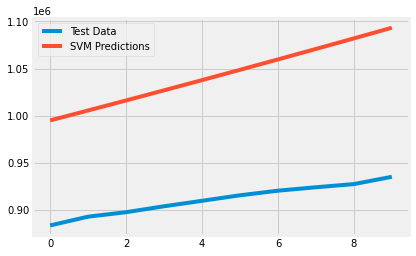

In [149]:
svm_death = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_death.fit(X_train_death, y_train_death)
svm_pred_death = svm_death.predict(future_forcast)
svm_test_pred_death = svm_death.predict(X_test_death)
plt.plot(y_test_death)
plt.plot(svm_test_pred_death)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred_death, y_test_death))
print('MSE:',mean_squared_error(svm_test_pred_death, y_test_death))

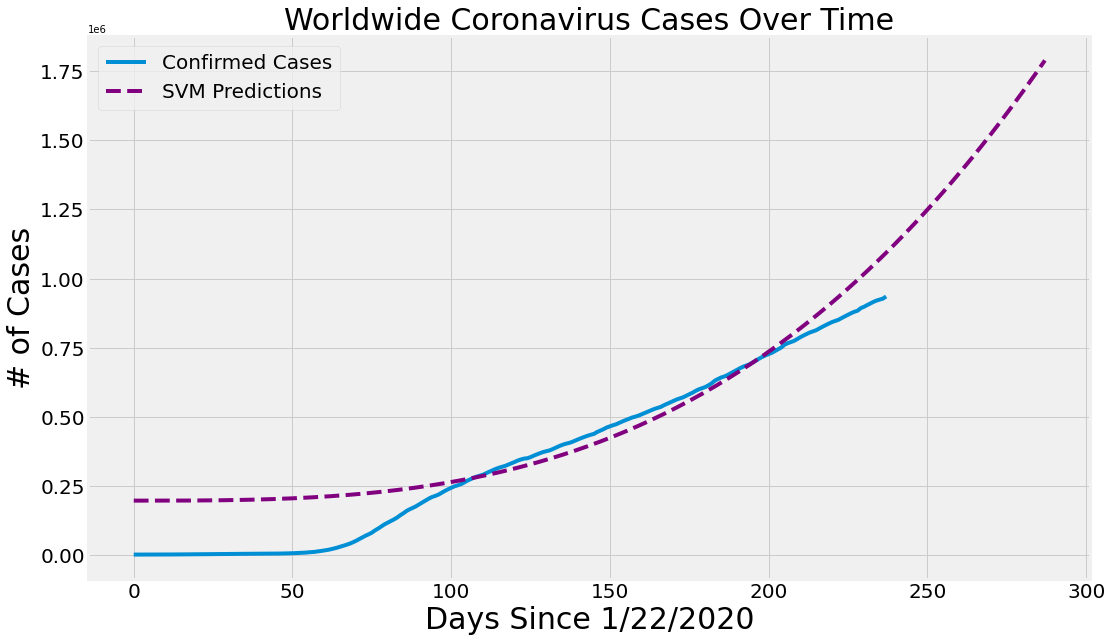

In [150]:
plot_predictions(adjusted_dates, total_deaths, svm_pred_death, 'SVM Predictions', 'purple')

In [151]:
poly = PolynomialFeatures(degree=5)
poly_X_train_death = poly.fit_transform(X_train_death)
poly_X_test_death = poly.fit_transform(X_test_death)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_death = bayesian_poly.fit_transform(X_train_death)
bayesian_poly_X_test_death = bayesian_poly.fit_transform(X_test_death)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_death, y_train_death)
test_linear_pred = linear_model.predict(poly_X_test_death)
linear_pred_death = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_death))
print('MSE:',mean_squared_error(test_linear_pred, y_test_death))

MAE: 33152.57594943419
MSE: 1276662969.3504205


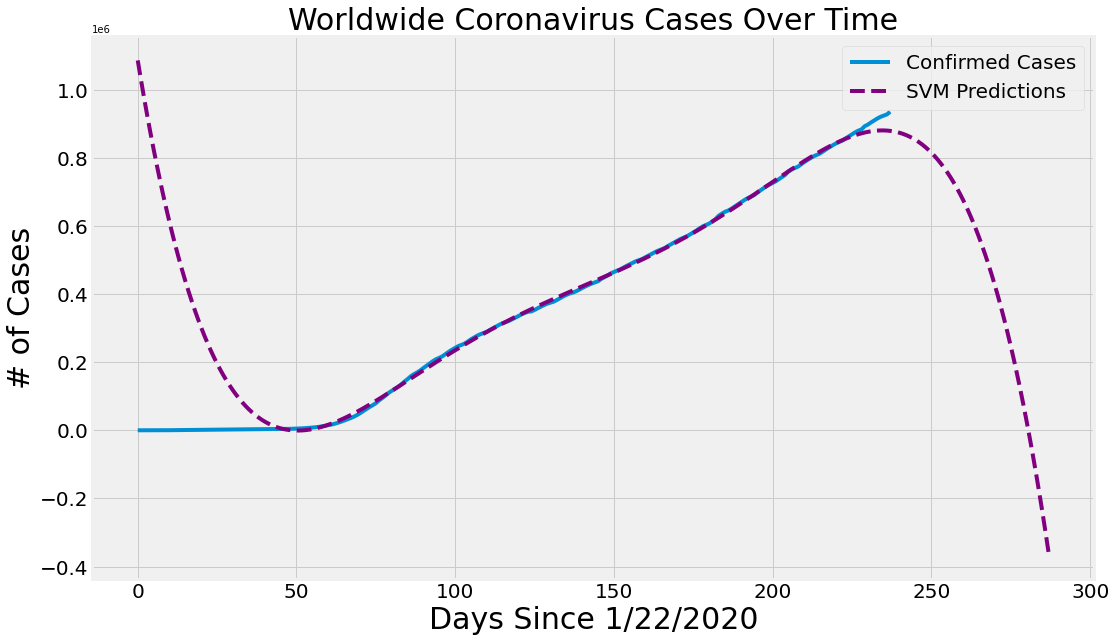

In [152]:
plot_predictions(adjusted_dates, total_deaths, linear_pred_death, 'SVM Predictions', 'purple')

In [153]:
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_death, y_train_death)
bayesian_search.best_params_
bayesian_death = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_death.predict(bayesian_poly_X_test_death)
bayesian_pred = bayesian_death.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_death))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_death))

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


MAE: 28331.70145647675
MSE: 893371102.2668518


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.5s finished


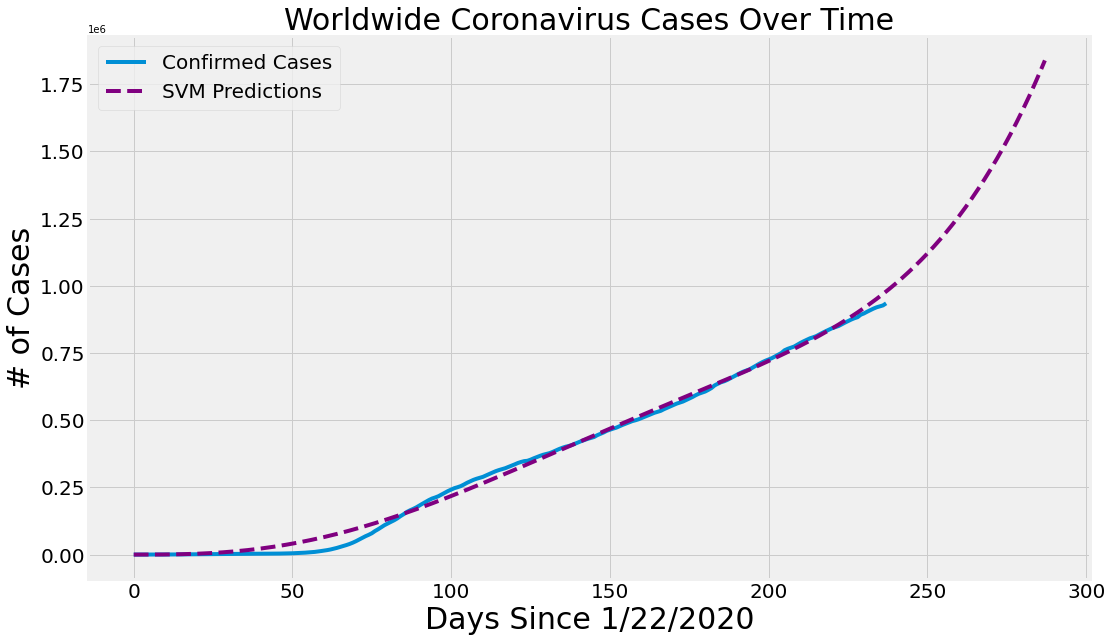

In [154]:
plot_predictions(adjusted_dates, total_deaths, bayesian_pred, 'SVM Predictions', 'purple')

In [155]:
X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(days_since_1_22[50:], total_recovered[50:], test_size=0.05, shuffle=False)

In [156]:
poly = PolynomialFeatures(degree=5)
poly_X_train_recovered = poly.fit_transform(X_train_recovered)
poly_X_test_recovered = poly.fit_transform(X_test_recovered)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_recovered = bayesian_poly.fit_transform(X_train_recovered)
bayesian_poly_X_test_recovered = bayesian_poly.fit_transform(X_test_recovered)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_recovered, y_train_recovered)
test_linear_pred = linear_model.predict(poly_X_test_recovered)
linear_pred_recovered = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_recovered))
print('MSE:',mean_squared_error(test_linear_pred, y_test_recovered))

tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_recovered, y_train_recovered)
bayesian_search.best_params_
bayesian_recovered = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_recovered.predict(bayesian_poly_X_test_recovered)
bayesian_pred = bayesian_recovered.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_recovered))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_recovered))

MAE: 32517.092448431253
MSE: 1636185665.041184
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


MAE: 592399.7057802137
MSE: 375979723857.24066


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.6s finished


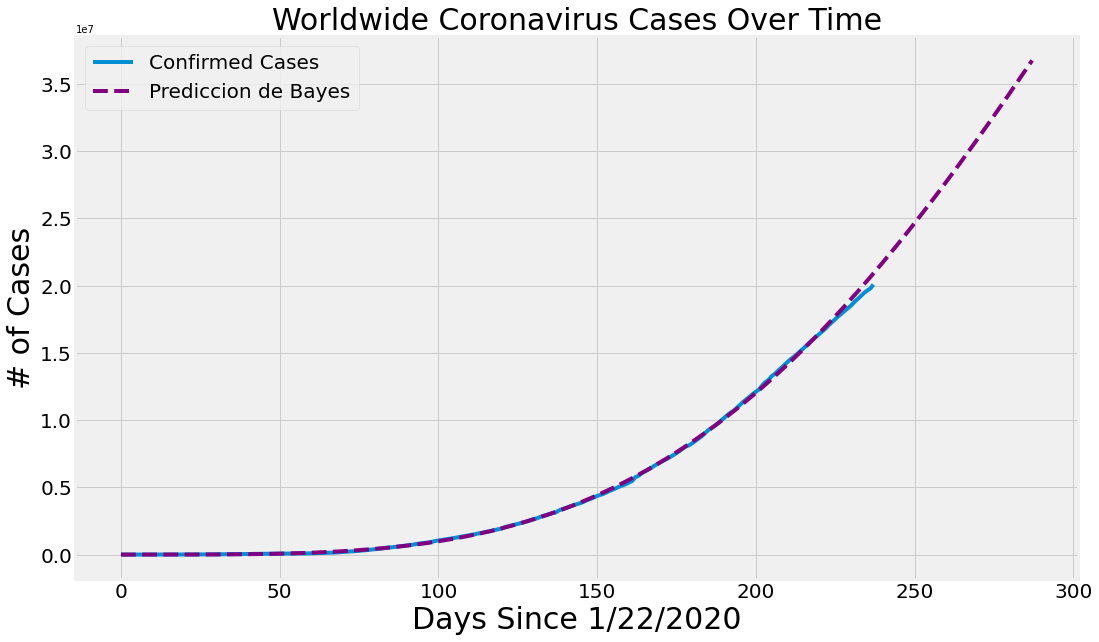

In [157]:
plot_predictions(adjusted_dates, total_recovered, bayesian_pred, 'Prediccion de Bayes', 'purple')